In [40]:
# Code for cleaning up the csv files

# Name of the csv file to clean up
csv_file = 'raw_logs/development_10sessions_new_raw.csv'
# Number of classifiers to mantain in the final csv file
developed_classifiers = 19

import pandas as pd

# Read the data from the CSV file
data = pd.read_csv(csv_file)

# Drop the rows where the column "developed_classifier" has a value greater than developed_classifiers
data = data[data['developed_classifier'] <= developed_classifiers]

# Drop the rows where the column "status" is "records_sent"
data = data[data['status'] != 'records_sent']

# Save the data to a new CSV file
data.to_csv('development_10sessions_new.csv', index=False)

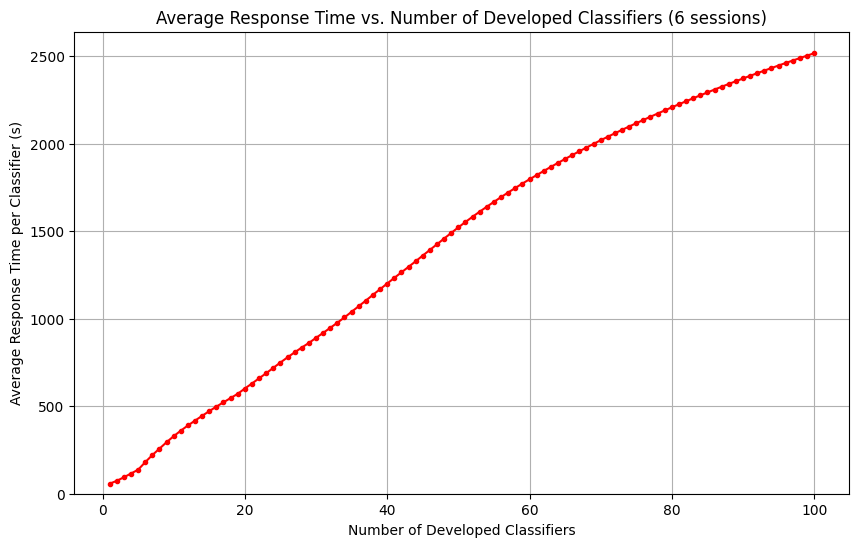

In [4]:
# Code for plotting the average response time vs. the number of developed classifiers

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'development_6sessions.csv'
data = pd.read_csv(file_path)

# Ensure the timestamps are treated as floats
data['timestamp'] = data['timestamp'].astype(float)

# Get the start time of the first classifier
start_time_first_classifier = data[(data['developed_classifier'] == 1) & (data['status'] == 'start')]['timestamp'].iloc[0]

# Get the maximum number of developed classifiers
max_classifiers = data['developed_classifier'].max()

# Initialize a list to store the average response times
average_response_times = []

# Iterate through the number of developed classifiers
for num_classifiers in range(1, max_classifiers + 1):
    response_times = []  # Store individual response times for this iteration

    # For each classifier up to the current number
    for classifier in range(1, num_classifiers + 1):
        # Get the production timestamp for this classifier
        prod_time = data[(data['developed_classifier'] == classifier) & (data['status'] == 'production')]['timestamp']

        # If the production timestamp exists, calculate the response time
        if not prod_time.empty:
            response_times.append(prod_time.iloc[0] - start_time_first_classifier)

    # Compute the average response time for the current number of classifiers
    if response_times:
        average_response_times.append(sum(response_times) / len(response_times))
    else:
        average_response_times.append(None)  # Handle cases where no data is available

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_classifiers + 1), average_response_times, marker='.', linestyle='-', color='r')

# Take the number of sessions used in the development from the file name
num_sessions = int(file_path.split('_')[1].split('sessions')[0])

plt.title('Average Response Time vs. Number of Developed Classifiers ({} sessions)'.format(num_sessions))
plt.xlabel('Number of Developed Classifiers')
# plt.xticks(range(1, max_classifiers + 1))
plt.ylabel('Average Response Time per Classifier (s)')
# y-xis starts from 0
plt.ylim(0)
plt.grid(True)
plt.show()